# Program Description of Prediction (Module 11)

## Overview:
This module is responsible for making predictions using a previously trained model. It takes the feature dataset to be tested, along with the trained model parameters and data preprocessing settings, and generates predictions. The results are then saved in a specified output file for further analysis.

## Key Steps:
1. **Input Files**:
   - The feature dataset to be tested is provided as input. This dataset may include features to be used for making predictions (e.g., test set).
   - The trained model parameters are loaded to make predictions based on the previously learned patterns.
   - The data preprocessing parameters, such as normalization or transformation settings, are also loaded to ensure the correct preprocessing of the input features.

2. **Model Loading**:
   - The trained model is loaded from the model's path. This model contains the learned weights and configurations based on the training phase.

3. **Data Preprocessing**:
   - The feature dataset is preprocessed (normalized, scaled, or transformed) based on the parameters used during the model's training phase to ensure consistency.

4. **Prediction**:
   - The trained model performs predictions on the preprocessed test data.

5. **Result Saving**:
   - The prediction results are saved in the `test_predictions.txt` file located in the model's path.


## Example:
- The model generates predictions for the test dataset, and the results are saved in the output file (`test_predictions.txt`) for further evaluation and comparison.
 folder.



contacts：zhaohf@ihep.ac.cn

#  Import libraries

In [1]:
import os
import tensorflow.keras as keras
import joblib
import numpy as np
import sys
import matplotlib.pyplot as plt

2025-01-15 19:16:49.159139: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
def get_python_version():
    return sys.version
def get_package_version(package_name):
    try:
        module = __import__(package_name)
        version = getattr(module, '__version__', None)
        if version:
            return version
        else:
            return pkg_resources.get_distribution(package_name).version
    except (ImportError, AttributeError, pkg_resources.DistributionNotFound):
        return "Version info not found"

packages = ['tensorflow', 'numpy', 'joblib']
for package in packages:
    print(f"{package}: {get_package_version(package)}")
print(f"Python: {get_python_version()}")

tensorflow: 2.9.1
numpy: 1.23.5
joblib: 1.4.0
Python: 3.8.15 | packaged by conda-forge | (default, Nov 22 2022, 08:46:39) 
[GCC 10.4.0]


# Parameter Settings (Input File and Output File)

## Input Files:
- **Feature File** (`file_path_feature`): The test set file containing the feature data that will be used for predictions.
    - Example: `"0926-datasets/datasets(JmolNN)-pre-xmu-cn/xmu_test_JmolNN.txt"`
- **Model File** (`best_model_path`): The path to the trained model that will be used for making predictions.
    - Example: `'0926-datasets-ml/ml-cn-xmu-(JmolNN)/MLPmodel-20250115_1903/best_model.h5'`

## Model Configuration:
- **round_predictions**: A boolean parameter that determines whether the predictions should be rounded. Set it to `True` if rounding is required.
    - Example: `round_predictions = True`
- **model_type**: Defines the type of model used for predictions, either `'MLP'` or `'CNN'`.
    - Example: `model_type = 'MLP'`
- **Regression**: A boolean parameter indicating whether the task is a regression task. Set to `True` for regression.
    - Example: `Regression = True`
- **min_label**: The minimum value for the label, used for adjusting the predicted values.
    - Example: `min_label = 2`

## Output:
- The output predictions will be saved in the `test_predictions.txt` file under the directory specified by the model path.

## File Existence Checks:
- The program checks if the model file (`best_model_path`) and feature file (`file_path_feature`) exist. If either file is missing, a `FileNotFoundError` is raised.


In [4]:
# Input file for the test set (features)
file_path_feature = "0926-datasets/datasets(JmolNN)-pre-xmu-cn/xmu_test_JmolNN.txt"

# Input file path for the trained model parameters
model_path = '0926-datasets-ml/ml-cn-xmu-(JmolNN)/MLPmodel-20250115_1903'
best_model_path = os.path.join(model_path, 'best_model.h5')

# Parameter to determine whether to round the model predictions
round_predictions = True  # Set to True if you want to round the predictions

# Select the type of model being used: 'MLP' for Multi-layer Perceptron or 'CNN' for Convolutional Neural Network
model_type = 'MLP'  # Options: 'MLP' or 'CNN'

# Set the regression flag to determine if the task is a regression problem
Regression = True  # Set to True for regression, False for classification

# Minimum label value (used for filtering or constraints)
min_label = 2

# Check if the necessary files exist
if not os.path.exists(best_model_path):
    raise FileNotFoundError(f"Model file not found: {best_model_path}")
if not os.path.exists(file_path_feature):
    raise FileNotFoundError(f"Feature file not found: {file_path_feature}")


# Load the Model, Load the Data, and Print Data Path Information

## Model Loading:
- The trained model is loaded using the `keras.models.load_model` function from the specified path (`best_model_path`).
    - Example: `model = keras.models.load_model(best_model_path)`

## Data Loading:
- The feature dataset (`file_path_feature`) is loaded using `np.loadtxt`.
    - Example: `X_test = np.loadtxt(file_path_feature)`
- If needed, you can uncomment the line to load the label data as well (`data_pre = np.loadtxt(file_path_label_pre, delimiter=',')`).

## Data Path Information:
- After loading the model and data, the paths of the loaded model and dataset are printed for verification.
    - Example: `print(f"Model loaded from: {best_model_path}")`
    - Example: `print(f"Features loaded from: {file_path_feature}, shape: {X_test.shape}")`

## Data Preprocessing:
- The test data (`X_test`) is preprocessed according to the model type:
  - For **CNN** models, the data is reshaped to include an extra dimension.
      - Preprocessing function: `preprocess_for_model_CNN(X)` which reshapes the data to `(-1, X.shape[1], 1)`.
  - For **MLP** models, the data remains unchanged.
      - Preprocessing function: `preprocess_for_model_MLP(X)` which keeps the data in its original form.
    - Example: `X_test_preprocessed = preprocess_ffor_model_MLP(X_test)` based on the `model_type`.


In [5]:
# Load the trained model
model = keras.models.load_model(best_model_path)

# Uncomment the following line if you need to load the scaler for preprocessing
# scaler = joblib.load(scaler_path)

# Load the test data (features)
X_test = np.loadtxt(file_path_feature)

# Print the loaded information
print(f"Model loaded from: {best_model_path}")
# Uncomment the following line if you need to print the output directory information
# print(f"Output directory created at: {output_dir}")
print(f"Features loaded from: {file_path_feature}, shape: {X_test.shape}")

# Apply preprocessing (scaling) to the test data if needed
# Uncomment the following line if you need to scale the test data
# X_test = scaler.transform(X_test_raw)

# Reshape the test data for CNN or MLP based on the model type
def preprocess_for_model_CNN(X):
    # Reshape the data for CNN input (e.g., add a channel dimension)
    return X.reshape(-1, X.shape[1], 1)

def preprocess_for_model_MLP(X):
    # For MLP, no reshaping is required (data remains 2D)
    return X

# Preprocess the test data based on the selected model type
if model_type == 'CNN':
    X_test_preprocessed = preprocess_for_model_CNN(X_test)
elif model_type == 'MLP':
    X_test_preprocessed = preprocess_for_model_MLP(X_test)


2025-01-15 19:17:29.446431: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model loaded from: 0926-datasets-ml/ml-cn-xmu-(JmolNN)/MLPmodel-20250115_1903/best_model.h5
Features loaded from: 0926-datasets/datasets(JmolNN)-pre-xmu-cn/xmu_test_JmolNN.txt, shape: (495, 1000)


# Predict the Dataset by Loading the Model and Save the Prediction Results

## Prediction for Regression Tasks:
- If the model is configured for regression (i.e., `Regression=True`), the model predicts continuous values for the test dataset (`X_test_preprocessed`).
    - The predictions are then flattened using `y_pre = y_pre.ravel()`.
    - If `round_predictions` is set to `True`, the predictions are rounded to the nearest integer using `y_pre = np.round(y_pre)`.

## Prediction for Classification Tasks:
- If the model is not a regression model, predictions are made for classification tasks.
    - For classification, the class probabilities are predicted using `model.predict(X_test)`, and the class labels are obtained by taking the `argmax` of the predictions.
    - The predicted class labels are adjusted by adding the `min_label` value: `y_pre = np.argmax(y_pred, axis=1) + min_label`.

## Saving Predictions:
- The predictions are saved to a file `test_predictions.txt` in the model directory (`model_path`).
    - Example: `np.savetxt(output_file, y_pre, delimiter=',')`
    - A message is printed to confirm the location of the saved predictions: `print(f"Predictions saved to: {output_file}")`.

## Plotting Predicted Labels Distribution:
- A histogram of the predicted labels (`y_pre`) is generated to show the distribution of the predicted values.
    - The histogram is saved as a PNG file (`predicted_y_distribution.png`) under the model path (`model_path`).
    - The plot includes labels for the x-axis, y-axis, and a title, along with a grid for better visualization.
    - Example: `plt.savefig(predicted_label_distribution_path)` and `plt.show()`.


In [6]:
if Regression:
    y_pre = model.predict(X_test_preprocessed)
    y_pre = y_pre.ravel()
    if round_predictions:
        y_pre = np.round(y_pre)
else:
    y_pred = model.predict(X_test)
    y_pre = np.argmax(y_pred, axis=1) + min_label   
# Apply rounding if round_predictions is True
output_file = os.path.join(model_path, "test_predictions.txt")
print(f"Output directory created at: {output_file}")
np.savetxt(output_file, y_pre, delimiter=',')
print(f"Predictions saved to: {output_file}")

16/16 [==============================] - 0s 2ms/step
Output directory created at: 0926-datasets-ml/ml-cn-xmu-(JmolNN)/MLPmodel-20250115_1903/test_predictions.txt
Predictions saved to: 0926-datasets-ml/ml-cn-xmu-(JmolNN)/MLPmodel-20250115_1903/test_predictions.txt


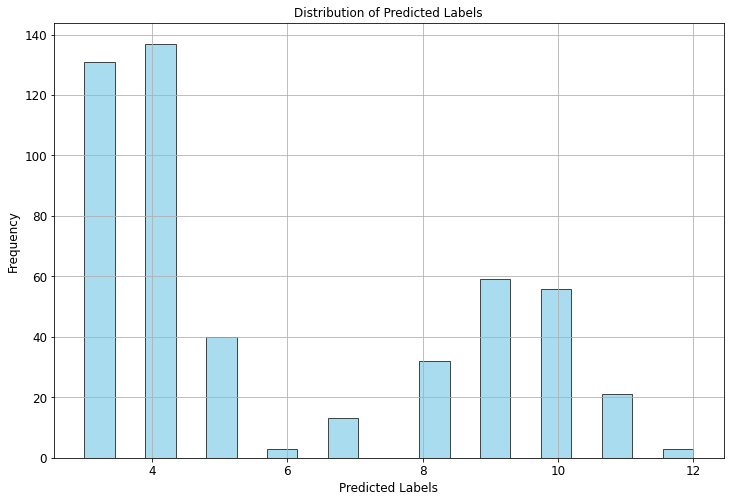

In [7]:
#Plot a distribution histogram of the predicted labels
plt.figure(figsize=(12, 8))
plt.hist(y_pre, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Predicted Labels", fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.grid(True)
predicted_label_distribution_path = os.path.join(model_path, "predicted_y_distribution.png")
plt.savefig(predicted_label_distribution_path)
plt.show()